In [ ]:
import os
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split 
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import keras

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 224  # Our training data consists of images with width of 224 pixels and height of 224 pixels

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/chess_data/new_data/Train',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(IMG_SHAPE, IMG_SHAPE),
  batch_size=BATCH_SIZE)

Found 6000 files belonging to 6 classes.
Using 4800 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/chess_data/new_data/Train',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(IMG_SHAPE, IMG_SHAPE),
  batch_size=BATCH_SIZE)

Found 6000 files belonging to 6 classes.
Using 1200 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['Bishop', 'King', 'Pawn', 'Queen', 'Rook', 'knight']


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(100, 224, 224, 3)
(100,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.21568629 1.0


In [ ]:
num_classes = 6

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0

In [ ]:
epochs=1000
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)
model.save("/content/drive/MyDrive/chess_data/new_data/model.h5")
np.save('/content/drive/MyDrive/chess_data/new_data/my_history.npy',history.history)

Epoch 1/1000
48/48 [==============================] - 169s 3s/step - loss: 1.8829 - accuracy: 0.3915 - val_loss: 0.9152 - val_accuracy: 0.6017
Epoch 2/1000
48/48 [==============================] - 4s 83ms/step - loss: 0.5492 - accuracy: 0.7990 - val_loss: 0.4560 - val_accuracy: 0.8242
Epoch 3/1000
48/48 [==============================] - 4s 83ms/step - loss: 0.1986 - accuracy: 0.9369 - val_loss: 0.1214 - val_accuracy: 0.9583
Epoch 4/1000
48/48 [==============================] - 4s 83ms/step - loss: 0.0968 - accuracy: 0.9706 - val_loss: 0.1132 - val_accuracy: 0.9567
Epoch 5/1000
48/48 [==============================] - 4s 83ms/step - loss: 0.0555 - accuracy: 0.9865 - val_loss: 0.0537 - val_accuracy: 0.9825
Epoch 6/1000
48/48 [==============================] - 4s 83ms/step - loss: 0.0461 - accuracy: 0.9862 - val_loss: 0.0656 - val_accuracy: 0.9783
Epoch 7/1000
48/48 [==============================] - 4s 83ms/step - loss: 0.0246 - accuracy: 0.9931 - val_loss: 0.0450 - val_accuracy: 0.9842

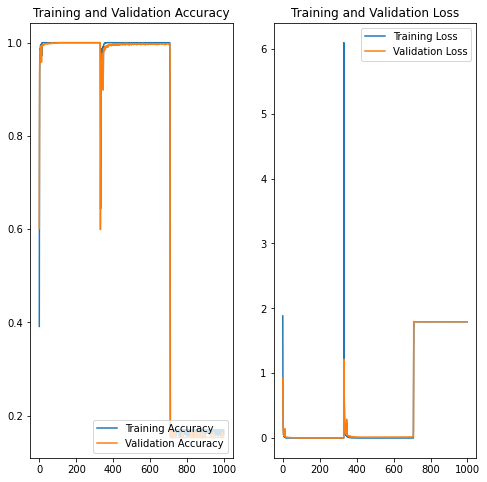

In [ ]:
import matplotlib.pyplot as plt
acc = history['accuracy']
val_acc = history['val_accuracy']

loss = history['loss']
val_loss = history['val_loss']

epochs_range = range(1000)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [4]:
from keras.models import load_model
import numpy as np
model = load_model("/content/drive/MyDrive/Chess_CNN/model.h5")
history=np.load('/content/drive/MyDrive/Chess_CNN/my_history.npy',allow_pickle='TRUE').item()

In [5]:
Train_model_accuracy = history['accuracy'][np.argmin(history['loss'])]
Test_model_accuracy = history['val_accuracy'][np.argmin(history['val_loss'])]
print("Train Accuracy is {}".format(Train_model_accuracy*100))
print("Test Accuracy is {}".format(Test_model_accuracy*100))

Train Accuracy is 100.0
Test Accuracy is 100.0
